# Creates plots from the eval runs over the checkpoints.

`2024-12-31_21-52-49_rlvr_gsm8k_only_smollm2_instruct` is the only real GSM8K only run.
https://wandb.ai/julesgm/open_instruct_rl/runs/jtobyw4t/overview is the associated Wandb run.

`2024-12-31_22-56-50_rlvr_gsm8k_only_smollm2_instruct` is the only real MATH only run.

In [1]:
import json
import pathlib
import matplotlib.pyplot as plt
import pandas as pd
import rich
import re
import sklearn.linear_model as skl_lin


def extract_step(path):
    """ Look at the path name and extract the step number.
    
    Big assumption: Just takes the last number in the path name.
    """
    
    return int(re.findall(r"\d+", path.parent.name)[-1])


def extract_info_file(*, file, task_key, is_baseline=False):
    """ Reads the lighteval JSON file and extract the performance.
    """ 

    file = pathlib.Path(file)

    if is_baseline:
        step = 0
    else:
        step = extract_step(file)

    d = json.loads(file.read_text())
    task_results = d["results"][task_key]
    qem = task_results["qem"]
    qem_stderr = task_results["qem_stderr"]

    return dict(step=step, qem=qem, qem_stderr=qem_stderr)


def plot_task(*, baseline_file, files, task_key, legend):
    """ Extracts the performance from the files
    """

    files = sorted(files, key=extract_step)
    
    shared = files[0].parent.parts
    for file_ in files:
        parts = file_.parent.parts
        for i, shared_part in enumerate(shared):
            if shared_part != parts[i]:
                shared = shared[:i]
                break
        if len(shared) == 0:
            break
    merged_shared = pathlib.Path(*shared)
    rich.print(f"[bold]Shared path: {merged_shared}")
    for file_ in files:
        print(file_.relative_to(merged_shared))
    
    results = [
        extract_info_file(
            file=baseline_file,
            task_key=task_key,
            is_baseline=True,
        )]

    for file in files:
        results.append(
            extract_info_file(
                file=file,
                task_key=task_key,
            )
        )

    results = pd.DataFrame(results)
    x = results["step"]
    y = results["qem"]    
    plt.plot(x, y, label=legend, marker="o")
    # Get the color of the last plot
    color = plt.gca().lines[-1].get_color()
    
    # # Smooth with a linear regression
    # model = skl_lin.LinearRegression(fit_intercept=False)
    # model.fit(x.values.reshape(-1, 1), y - y[0])
    # x_pred = pd.Series(range(0, x.max() + 1))
    # y_pred = model.predict(x_pred.values.reshape(-1, 1)) + y[0]
    # plt.plot(x_pred, y_pred, linestyle="--", color=color)


Shared path: 
/home/mila/g/gagnonju/marglicot/with_open-instruct/light_eval_tests/previous_outputs/outputs_gsm8k/results

_network_scratch_g_gagnonju_open_instruct_output_2024-12-31_21-52-49_rlvr_gsm8k_only_smollm2_instruct_checkpoints_step_100/results_2025-01-04T21-10-51.034650.json
_network_scratch_g_gagnonju_open_instruct_output_2024-12-31_21-52-49_rlvr_gsm8k_only_smollm2_instruct_checkpoints_step_200/results_2025-01-04T21-07-13.629939.json
_network_scratch_g_gagnonju_open_instruct_output_2024-12-31_21-52-49_rlvr_gsm8k_only_smollm2_instruct_checkpoints_step_300/results_2025-01-02T15-53-10.941737.json
_network_scratch_g_gagnonju_open_instruct_output_2024-12-31_21-52-49_rlvr_gsm8k_only_smollm2_instruct_checkpoints_step_400/results_2025-01-04T21-19-41.045035.json
_network_scratch_g_gagnonju_open_instruct_output_2024-12-31_21-52-49_rlvr_gsm8k_only_smollm2_instruct_checkpoints_step_500/results_2025-01-02T15-57-34.620368.json
_network_scratch_g_gagnonju_open_instruct_output_2024-12-31_21-52-49_rlvr_gsm8k_only_smollm2_instruct_checkpoints_step_600/results_2025-01-02T16-01-45.983165.json
_network_scratch_g_gag

Shared path: 
/home/mila/g/gagnonju/marglicot/with_open-instruct/light_eval_tests/previous_outputs/outputs_gsm8k/results

_network_scratch_g_gagnonju_open_instruct_output_2024-12-31_21-22-51_rlvr_gsm8k_only_smollm2_instruct_checkpoints_step_100/results_2025-01-04T21-29-59.825995.json
_network_scratch_g_gagnonju_open_instruct_output_2024-12-31_21-22-51_rlvr_gsm8k_only_smollm2_instruct_checkpoints_step_200_/results_2025-01-02T17-18-00.708188.json
_network_scratch_g_gagnonju_open_instruct_output_2024-12-31_21-22-51_rlvr_gsm8k_only_smollm2_instruct_checkpoints_step_200/results_2025-01-04T21-34-08.303702.json
_network_scratch_g_gagnonju_open_instruct_output_2024-12-31_21-22-51_rlvr_gsm8k_only_smollm2_instruct_checkpoints_step_300_/results_2025-01-02T17-13-32.598129.json
_network_scratch_g_gagnonju_open_instruct_output_2024-12-31_21-22-51_rlvr_gsm8k_only_smollm2_instruct_checkpoints_step_300/results_2025-01-04T21-34-30.258871.json
_network_scratch_g_gagnonju_open_instruct_output_2024-12-31_21-22-51_rlvr_gsm8k_only_smollm2_instruct_checkpoints_step_400/results_2025-01-04T21-34-50.389156.json
_network_scratch_g_g

Shared path: 
/home/mila/g/gagnonju/marglicot/with_open-instruct/light_eval_tests/previous_outputs/outputs_math/results

_network_scratch_g_gagnonju_open_instruct_output_2024-12-31_21-22-51_rlvr_gsm8k_only_smollm2_instruct_checkpoints_step_100/results_2025-01-05T00-06-41.120713.json
_network_scratch_g_gagnonju_open_instruct_output_2024-12-31_21-22-51_rlvr_gsm8k_only_smollm2_instruct_checkpoints_step_100_/results_2025-01-04T22-26-47.880870.json
_network_scratch_g_gagnonju_open_instruct_output_2024-12-31_21-22-51_rlvr_gsm8k_only_smollm2_instruct_checkpoints_step_200_/results_2025-01-04T22-27-14.322144.json
_network_scratch_g_gagnonju_open_instruct_output_2024-12-31_21-22-51_rlvr_gsm8k_only_smollm2_instruct_checkpoints_step_200/results_2025-01-05T00-06-50.941052.json
_network_scratch_g_gagnonju_open_instruct_output_2024-12-31_21-22-51_rlvr_gsm8k_only_smollm2_instruct_checkpoints_step_300_/results_2025-01-04T22-26-37.058479.json
_network_scratch_g_gagnonju_open_instruct_output_2024-12-31_21-22-51_rlvr_gsm8k_only_smollm2_instruct_checkpoints_step_300/results_2025-01-05T00-05-54.452838.json
_network_scratch_g_

Shared path: 
/home/mila/g/gagnonju/marglicot/with_open-instruct/light_eval_tests/previous_outputs/outputs_math/results

_network_scratch_g_gagnonju_open_instruct_output_2024-12-31_22-56-50_rlvr_gsm8k_only_smollm2_instruct_checkpoints_step_100/results_2025-01-05T19-57-21.189800.json
_network_scratch_g_gagnonju_open_instruct_output_2024-12-31_22-56-50_rlvr_gsm8k_only_smollm2_instruct_checkpoints_step_200/results_2025-01-05T19-56-45.466778.json
_network_scratch_g_gagnonju_open_instruct_output_2024-12-31_22-56-50_rlvr_gsm8k_only_smollm2_instruct_checkpoints_step_300/results_2025-01-02T21-26-53.560149.json
_network_scratch_g_gagnonju_open_instruct_output_2024-12-31_22-56-50_rlvr_gsm8k_only_smollm2_instruct_checkpoints_step_300/results_2025-01-05T19-56-15.305280.json
_network_scratch_g_gagnonju_open_instruct_output_2024-12-31_22-56-50_rlvr_gsm8k_only_smollm2_instruct_checkpoints_step_400/results_2025-01-05T19-56-11.367883.json
_network_scratch_g_gagnonju_open_instruct_output_2024-12-31_22-56-50_rlvr_gsm8k_only_smollm2_instruct_checkpoints_step_500/results_2025-01-05T20-10-43.044248.json
_network_scratch_g_gag

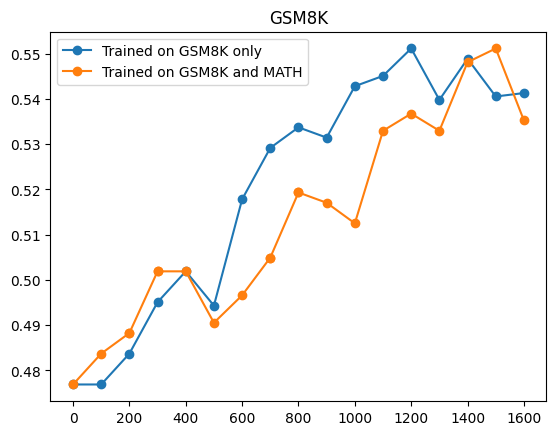

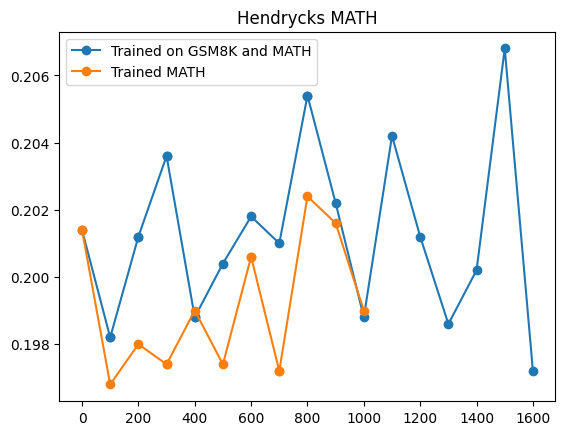

In [8]:
# Code to make plots for specific tasks.

MATH_BASELINE = "/home/mila/g/gagnonju/marglicot/with_open-instruct/light_eval_tests/previous_outputs/outputs_math/results/HuggingFaceTB/SmolLM2-1.7B-Instruct/results_2025-01-02T20-51-13.105551.json"
GSM8K_BASELINE = "/home/mila/g/gagnonju/marglicot/with_open-instruct/light_eval_tests/previous_outputs/outputs_gsm8k/results/HuggingFaceTB/SmolLM2-1.7B-Instruct/results_2025-01-02T15-48-12.453113.json"

def gsm8k():
    task_key = "custom|gsm8k|8"
    eval_output_root_path = pathlib.Path("/home/mila/g/gagnonju/marglicot/with_open-instruct/light_eval_tests/previous_outputs/outputs_gsm8k/results/")
    plt.figure()
    plt.title("GSM8K")
    gsm8k_baseline_file = eval_output_root_path / "HuggingFaceTB/SmolLM2-1.7B-Instruct/results_2025-01-02T15-48-12.453113.json"

    # GSM8K only
    glob_pattern = "_network_scratch_g_gagnonju_open_instruct_output_2024-12-31_21-52-49_rlvr_gsm8k_only_smollm2_instruct_checkpoints_step_*/*.json"
    files = eval_output_root_path.glob(glob_pattern)
    plot_task(baseline_file=gsm8k_baseline_file, files=files, task_key=task_key, legend="Trained on GSM8K only")
    print()
    
    # GSM8K and MATH
    glob_pattern = "_network_scratch_g_gagnonju_open_instruct_output_2024-12-31_21-22-51_rlvr_gsm8k_only_smollm2_instruct_checkpoints_step_*/*.json"
    files = eval_output_root_path.glob(glob_pattern)
    plot_task(baseline_file=gsm8k_baseline_file, files=files, task_key=task_key, legend="Trained on GSM8K and MATH")

    plt.legend()


def math():
    task_key = "custom|math|5"
    eval_output_root_path = pathlib.Path("/home/mila/g/gagnonju/marglicot/with_open-instruct/light_eval_tests/previous_outputs/outputs_math/results/")

    plt.figure()
    plt.title("Hendrycks MATH")
    
    # Baseline
    math_baseline_file = eval_output_root_path / "HuggingFaceTB/SmolLM2-1.7B-Instruct/results_2025-01-02T20-51-13.105551.json"

    # GSM8K and MATH
    glob_pattern = "_network_scratch_g_gagnonju_open_instruct_output_2024-12-31_21-22-51_rlvr_gsm8k_only_smollm2_instruct_checkpoints_step_*/*.json"
    files = eval_output_root_path.glob(glob_pattern)
    plot_task(
        baseline_file=math_baseline_file, 
        files=files, 
        task_key=task_key, 
        legend="Trained on GSM8K and MATH"
    )

    glob_pattern = "_network_scratch_g_gagnonju_open_instruct_output_2024-12-31_22-56-50_rlvr_gsm8k_only_smollm2_instruct_checkpoints_step_*/*.json"
    files = eval_output_root_path.glob(glob_pattern)
    plot_task(
        baseline_file=math_baseline_file, 
        files=files, 
        task_key=task_key, 
        legend="Trained MATH"
    )

    plt.legend()


gsm8k()
math()

Shared path: /home/mila/g/gagnonju/marglicot/with_open-instruct/light_eval_tests/lambdal_outputs_gsm8k/results

_network_scratch_g_gagnonju_lambdal_marglicot_openinstruct_open_instruct_output_2025-02-10_19-32-40_rlvr_gsm8k_only_smollm2_instruct_checkpoints_step_100/results_2025-02-17T00-41-05.187288.json
_network_scratch_g_gagnonju_lambdal_marglicot_openinstruct_open_instruct_output_2025-02-10_19-32-40_rlvr_gsm8k_only_smollm2_instruct_checkpoints_step_200/results_2025-02-17T00-41-06.114740.json
_network_scratch_g_gagnonju_lambdal_marglicot_openinstruct_open_instruct_output_2025-02-10_19-32-40_rlvr_gsm8k_only_smollm2_instruct_checkpoints_step_300/results_2025-02-17T00-40-52.772795.json
_network_scratch_g_gagnonju_lambdal_marglicot_openinstruct_open_instruct_output_2025-02-10_19-32-40_rlvr_gsm8k_only_smollm2_instruct_checkpoints_step_400/results_2025-02-17T00-41-10.891023.json
_network_scratch_g_gagnonju_lambdal_marglicot_openinstruct_open_instruct_output_2025-02-10_19-32-40_rlvr_gsm8k_only_smollm2_instruct_checkpoints_step_500/results_2025-02-17T00-47-01.013655.json
_network_scratch_g_gagnonju_la

Shared path: 
/home/mila/g/gagnonju/marglicot/with_open-instruct/light_eval_tests/lambdal_outputs_task_gsm8k_train_gsm8k_math/res
ults

_network_scratch_g_gagnonju_lambdal_marglicot_openinstruct_open_instruct_output_2025-02-10_19-35-25_rlvr_gsm8k_math_smollm2_instruct_checkpoints_step_100/results_2025-02-17T05-36-34.642266.json
_network_scratch_g_gagnonju_lambdal_marglicot_openinstruct_open_instruct_output_2025-02-10_19-35-25_rlvr_gsm8k_math_smollm2_instruct_checkpoints_step_200/results_2025-02-17T05-36-37.607680.json
_network_scratch_g_gagnonju_lambdal_marglicot_openinstruct_open_instruct_output_2025-02-10_19-35-25_rlvr_gsm8k_math_smollm2_instruct_checkpoints_step_300/results_2025-02-17T05-36-39.604684.json
_network_scratch_g_gagnonju_lambdal_marglicot_openinstruct_open_instruct_output_2025-02-10_19-35-25_rlvr_gsm8k_math_smollm2_instruct_checkpoints_step_400/results_2025-02-17T05-36-53.348107.json
_network_scratch_g_gagnonju_lambdal_marglicot_openinstruct_open_instruct_output_2025-02-10_19-35-25_rlvr_gsm8k_math_smollm2_instruct_checkpoints_step_500/results_2025-02-17T05-36-40.286376.json
_network_scratch_g_gagnonju_la

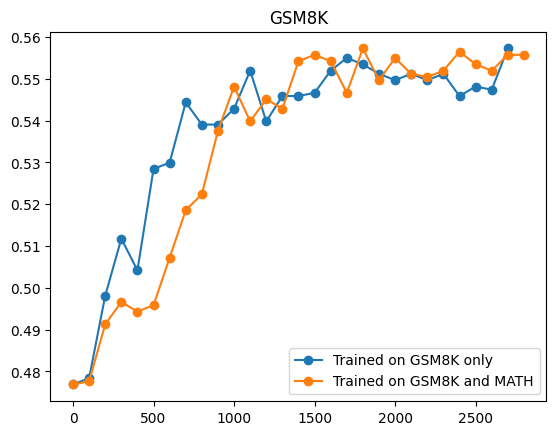

In [9]:
def gsm8k_lambdal():
    task_key = "custom|gsm8k|8"
    eval_output_root_path = pathlib.Path("/home/mila/g/gagnonju/marglicot/with_open-instruct/light_eval_tests/lambdal_outputs_gsm8k/results/")
    
    plt.figure()
    plt.title("GSM8K")

    gsm8k_baseline_file = GSM8K_BASELINE

    # GSM8K only
    glob_pattern = "_network_scratch_g_gagnonju_lambdal_marglicot_openinstruct_open_instruct_output_2025-02-10_19-32-40_rlvr_gsm8k_only_smollm2_instruct_checkpoints_step_*/*.json"
    files = eval_output_root_path.glob(glob_pattern)
    assert files, "GSM8K Only: No files found"
    plot_task(baseline_file=gsm8k_baseline_file, files=files, task_key=task_key, legend="Trained on GSM8K only")
    print()
    
    eval_output_root_path = pathlib.Path("/home/mila/g/gagnonju/marglicot/with_open-instruct/light_eval_tests/lambdal_outputs_task_gsm8k_train_gsm8k_math/results")

    # GSM8K and MATH
    glob_pattern = "_network_scratch_g_gagnonju_lambdal_marglicot_openinstruct_open_instruct_output_2025-02-10_19-35-25_rlvr_gsm8k_math_smollm2_instruct_checkpoints_step_*/*.json"
    files = eval_output_root_path.glob(glob_pattern)
    assert files, "GSM8K & MATH: No files found"
    plot_task(baseline_file=gsm8k_baseline_file, files=files, task_key=task_key, legend="Trained on GSM8K and MATH")

    plt.legend()
gsm8k_lambdal()

Shared path: 
/home/mila/g/gagnonju/marglicot/with_open-instruct/light_eval_tests/lambdal_outputs_task_math_train_gsm8k_math/resu
lts

_network_scratch_g_gagnonju_lambdal_marglicot_openinstruct_open_instruct_output_2025-02-10_19-35-25_rlvr_gsm8k_math_smollm2_instruct_checkpoints_step_100/results_2025-02-17T06-00-41.089768.json
_network_scratch_g_gagnonju_lambdal_marglicot_openinstruct_open_instruct_output_2025-02-10_19-35-25_rlvr_gsm8k_math_smollm2_instruct_checkpoints_step_200/results_2025-02-17T06-00-29.495174.json
_network_scratch_g_gagnonju_lambdal_marglicot_openinstruct_open_instruct_output_2025-02-10_19-35-25_rlvr_gsm8k_math_smollm2_instruct_checkpoints_step_300/results_2025-02-17T06-00-00.614001.json
_network_scratch_g_gagnonju_lambdal_marglicot_openinstruct_open_instruct_output_2025-02-10_19-35-25_rlvr_gsm8k_math_smollm2_instruct_checkpoints_step_400/results_2025-02-17T05-59-36.494105.json
_network_scratch_g_gagnonju_lambdal_marglicot_openinstruct_open_instruct_output_2025-02-10_19-35-25_rlvr_gsm8k_math_smollm2_instruct_checkpoints_step_500/results_2025-02-17T05-59-03.745781.json
_network_scratch_g_gagnonju_la

Shared path: /home/mila/g/gagnonju/marglicot/with_open-instruct/light_eval_tests/lambdal_outputs_math/results

_network_scratch_g_gagnonju_lambdal_marglicot_openinstruct_open_instruct_output_2025-02-10_19-33-46_rlvr_math_only_smollm2_instruct_checkpoints_step_100/results_2025-02-17T05-17-31.465666.json
_network_scratch_g_gagnonju_lambdal_marglicot_openinstruct_open_instruct_output_2025-02-10_19-33-46_rlvr_math_only_smollm2_instruct_checkpoints_step_200/results_2025-02-17T05-17-09.479201.json
_network_scratch_g_gagnonju_lambdal_marglicot_openinstruct_open_instruct_output_2025-02-10_19-33-46_rlvr_math_only_smollm2_instruct_checkpoints_step_300/results_2025-02-17T05-17-01.649768.json
_network_scratch_g_gagnonju_lambdal_marglicot_openinstruct_open_instruct_output_2025-02-10_19-33-46_rlvr_math_only_smollm2_instruct_checkpoints_step_400/results_2025-02-17T05-16-55.835124.json
_network_scratch_g_gagnonju_lambdal_marglicot_openinstruct_open_instruct_output_2025-02-10_19-33-46_rlvr_math_only_smollm2_instruct_checkpoints_step_500/results_2025-02-17T05-16-58.448276.json
_network_scratch_g_gagnonju_lambdal

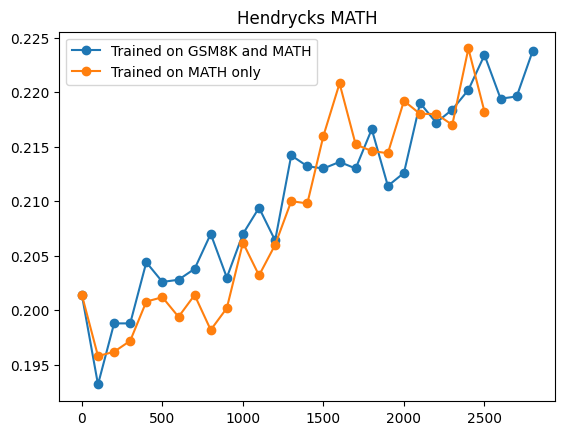

In [23]:
def from_path_and_glob(*, path, glob_pattern, baseline_file, task_key, setting_name):
    assert path.exists(), path
    
    path_glob_pattern = pathlib.Path(glob_pattern)
    assert len(pathlib.Path(glob_pattern).parts) == 2
    
    files = sorted(path.glob(glob_pattern))
    assert files, f"{setting_name}: No files found"

    plot_task(
        baseline_file=baseline_file, 
        files=files,
        task_key=task_key, 
        legend=f"Trained on {setting_name}"
    )

def math_lambdal():
    task_key = "custom|math|5"

    plt.figure()
    plt.title("Hendrycks MATH")
    
    # Baseline
    math_baseline_file = pathlib.Path(MATH_BASELINE)
    assert math_baseline_file.exists(), "Baseline file not found"

    # GSM8K and MATH
    task_math_train_gsm8k_math_path = pathlib.Path("/home/mila/g/gagnonju/marglicot/with_open-instruct/light_eval_tests/lambdal_outputs_task_math_train_gsm8k_math/results/")
    glob_pattern = "_network_scratch_g_gagnonju_lambdal_marglicot_openinstruct_open_instruct_output_2025-02-10_19-35-25_rlvr_gsm8k_math_smollm2_instruct_checkpoints_step_*/*.json"
    from_path_and_glob(
        path=task_math_train_gsm8k_math_path,
        glob_pattern=glob_pattern,
        baseline_file=math_baseline_file,
        task_key=task_key,
        setting_name="GSM8K and MATH"
    )

    # MATH
    task_math_train_math = pathlib.Path("/home/mila/g/gagnonju/marglicot/with_open-instruct/light_eval_tests/lambdal_outputs_math/results/")
    glob_pattern = "_network_scratch_g_gagnonju_lambdal_marglicot_openinstruct_open_instruct_output_2025-02-10_19-33-46_rlvr_math_only_smollm2_instruct_checkpoints_step_*/*.json"
    from_path_and_glob(
        path=task_math_train_math,
        glob_pattern=glob_pattern,
        baseline_file=math_baseline_file,
        task_key=task_key,
        setting_name="MATH only"
    )

    plt.legend()

math_lambdal()
